<h2>Opening and Resizing an Image</h2>

In [16]:
from PIL import Image
pic= Image.open("sample.jpg") # open colour image

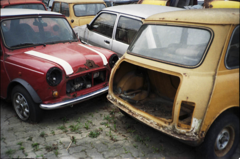

In [17]:
x, y = pic.size
x //= 5
y //= 5
smaller = pic.resize((x, y))
smaller

<h3>Export as JPEG</h3>

In [18]:
outfile ="smaller.jpg"
try:
    smaller.save(outfile)
except IOError:
    print("cannot convert", outfile)

<h2>B&W Conversion</h2>

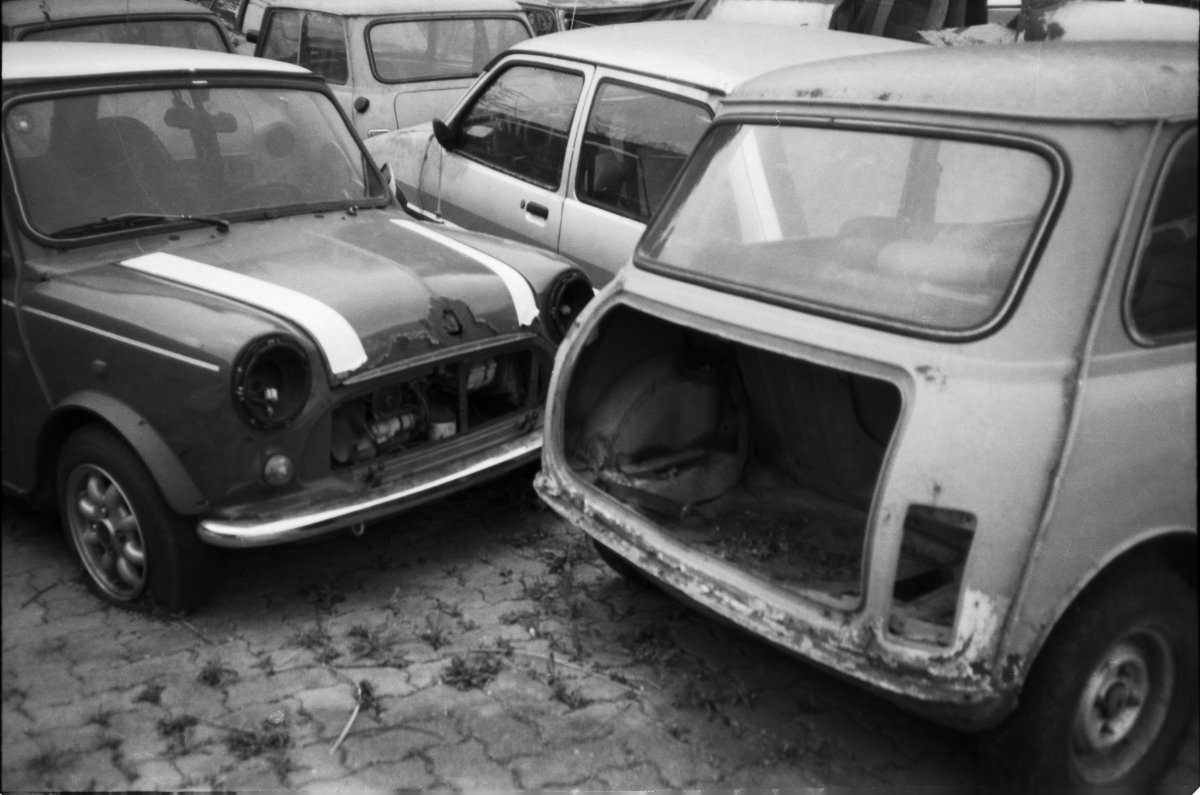

In [19]:
better_file = pic.convert("L") # convert image to B&W
better_file

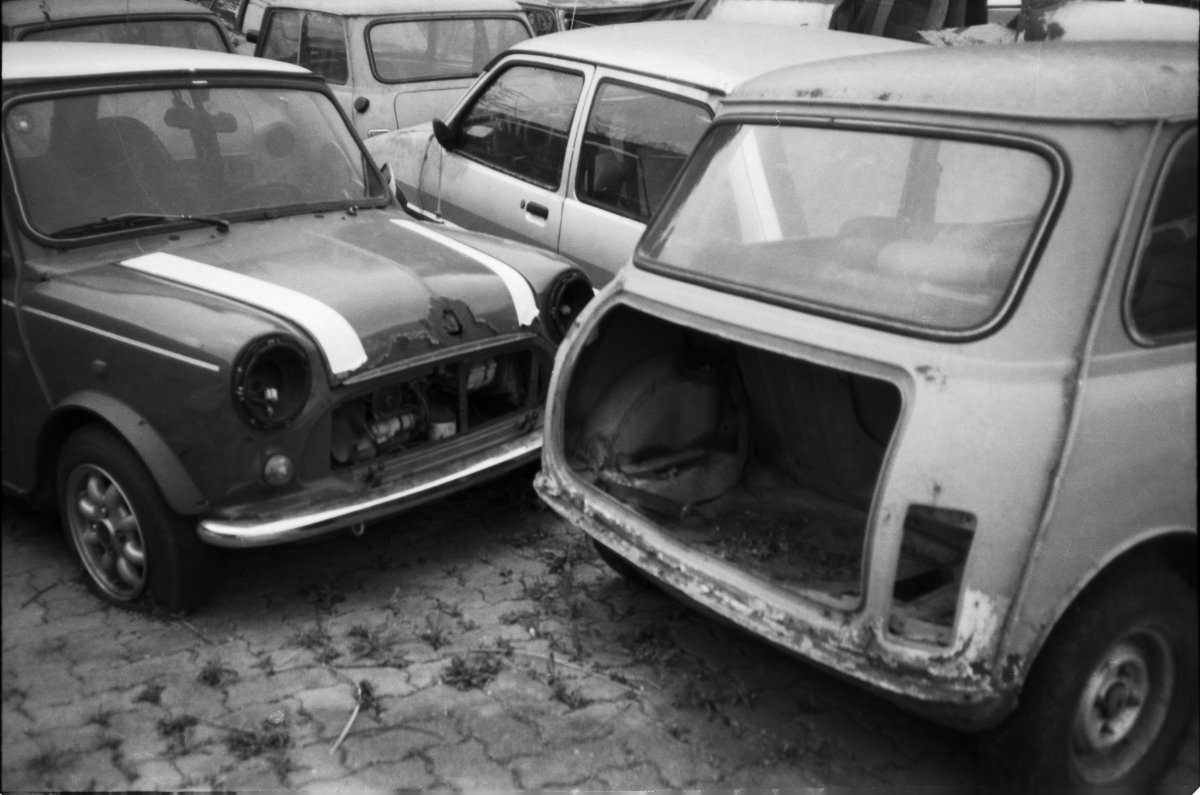

In [20]:
#Auto Constrast
from PIL import ImageOps
with_constrast = ImageOps.autocontrast(better_file)
with_constrast.save("bw.jpg")
with_constrast

<h2>Convert a negative to a positive</h2>

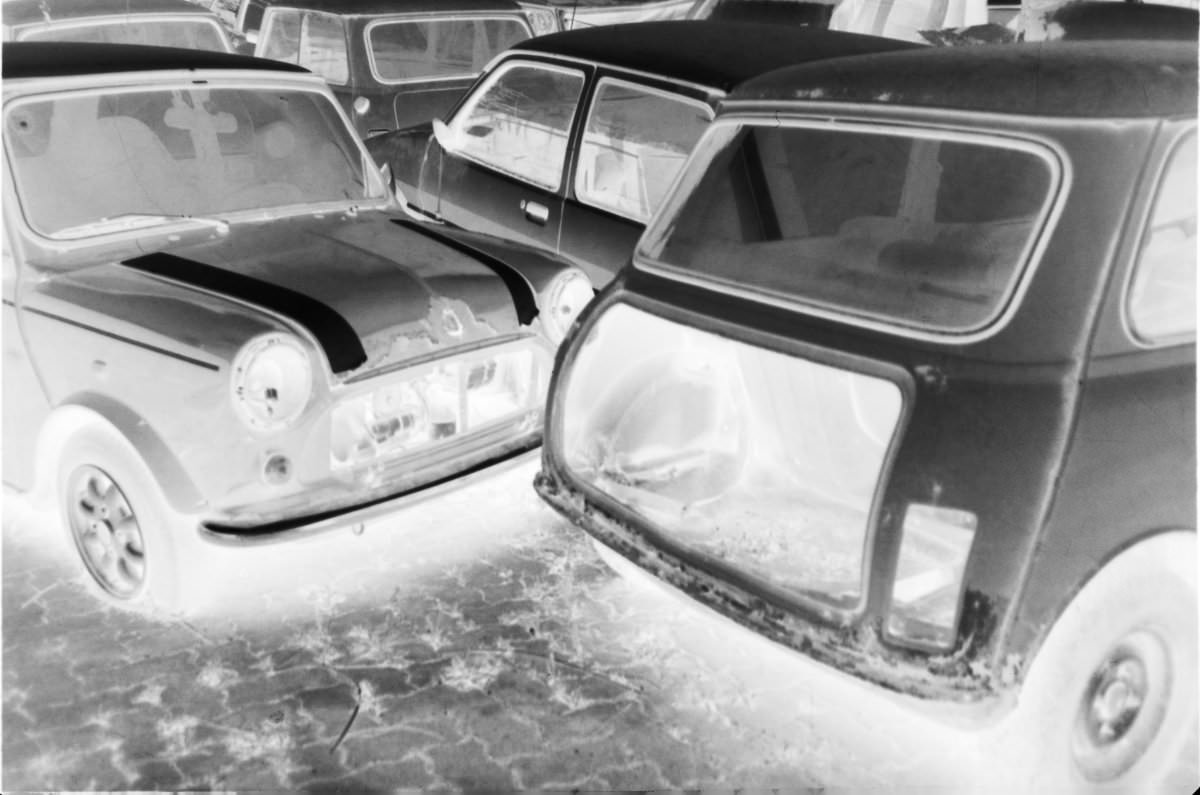

In [34]:
im_invert = ImageOps.invert(better_file)
im_invert.save("negative.jpg")
im_invert

<h3>Transposing an image</h3>
<p>To rotate the image in 90 degree steps, you can either use the rotate() method or the transpose() method. The latter can also be used to flip an image around its horizontal or vertical axis.</p>

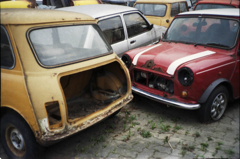

In [22]:
out = smaller.transpose(Image.FLIP_LEFT_RIGHT)
out

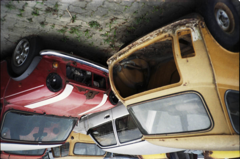

In [23]:
out = smaller.transpose(Image.FLIP_TOP_BOTTOM)
out

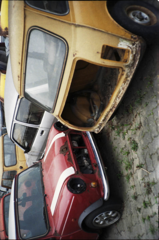

In [24]:
out = smaller.transpose(Image.ROTATE_90)
out

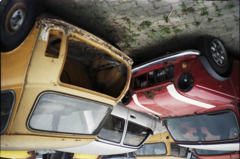

In [25]:
out = smaller.transpose(Image.ROTATE_180)
out

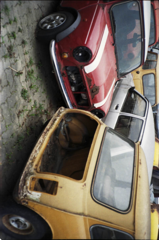

In [26]:
out = smaller.transpose(Image.ROTATE_270)
out

<h2>Filters - Add Details</h2>

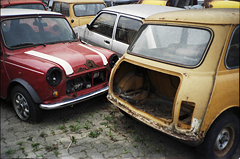

In [27]:
from PIL import ImageFilter
details = smaller.filter(ImageFilter.DETAIL)


from PIL import ImageEnhance
enh = ImageEnhance.Contrast(details)
enh.enhance(1.3).show("30% more contrast")

details

<h2>Filters - Edge Detection etc...</h2>

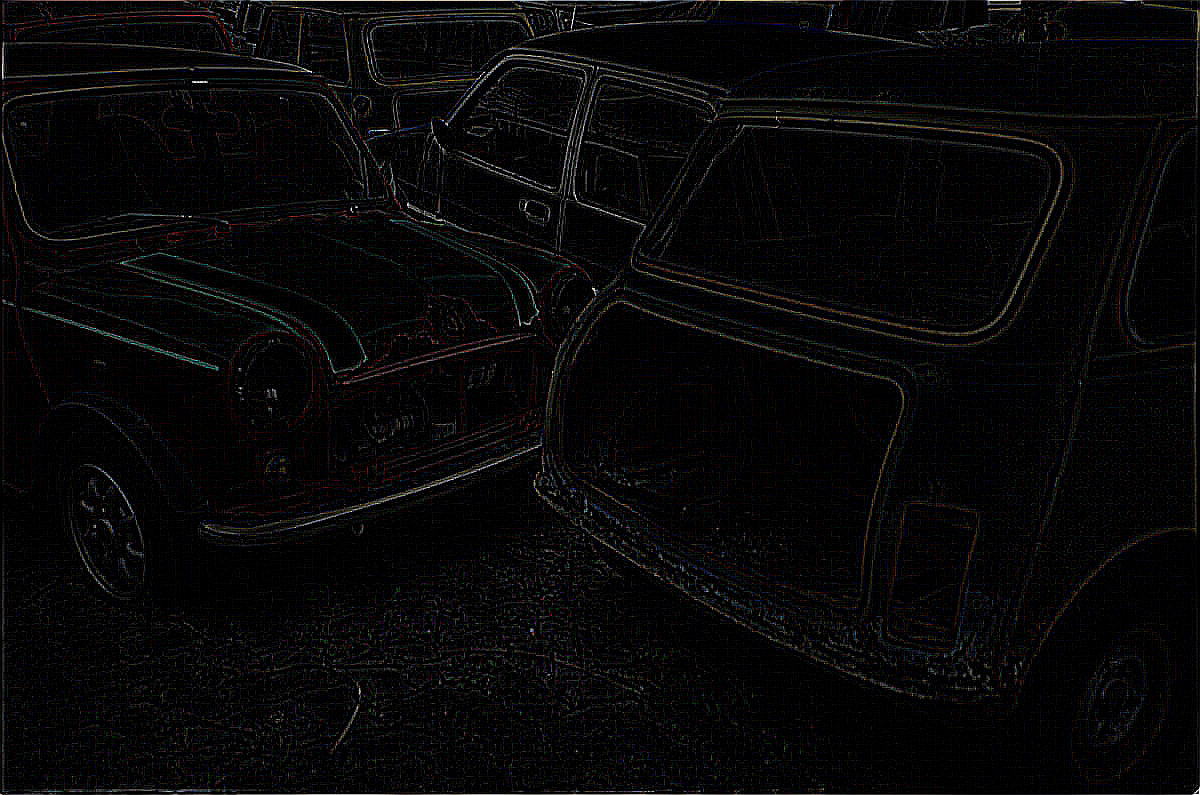

In [31]:
edges = pic.filter(ImageFilter.FIND_EDGES)
edges

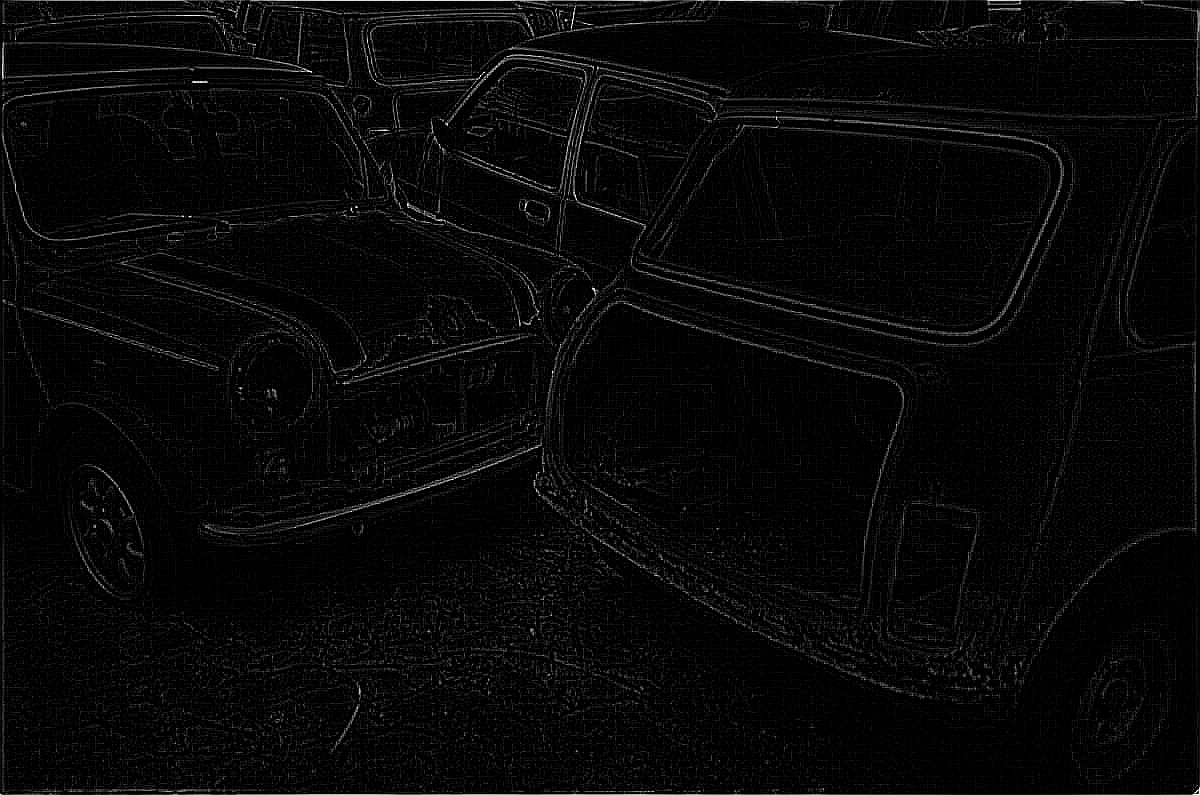

In [33]:
bands = edges.split()
bands[0].save("sketch.jpg")
bands[0]

<h3>Create a thumbnail</h3>

In [30]:
size = (128, 128)  
try:
    smaller.thumbnail(size)
    smaller.save("thumbnail.jpg", "JPEG")
except IOError:
    print("cannot create thumbnail for", outfile)
  

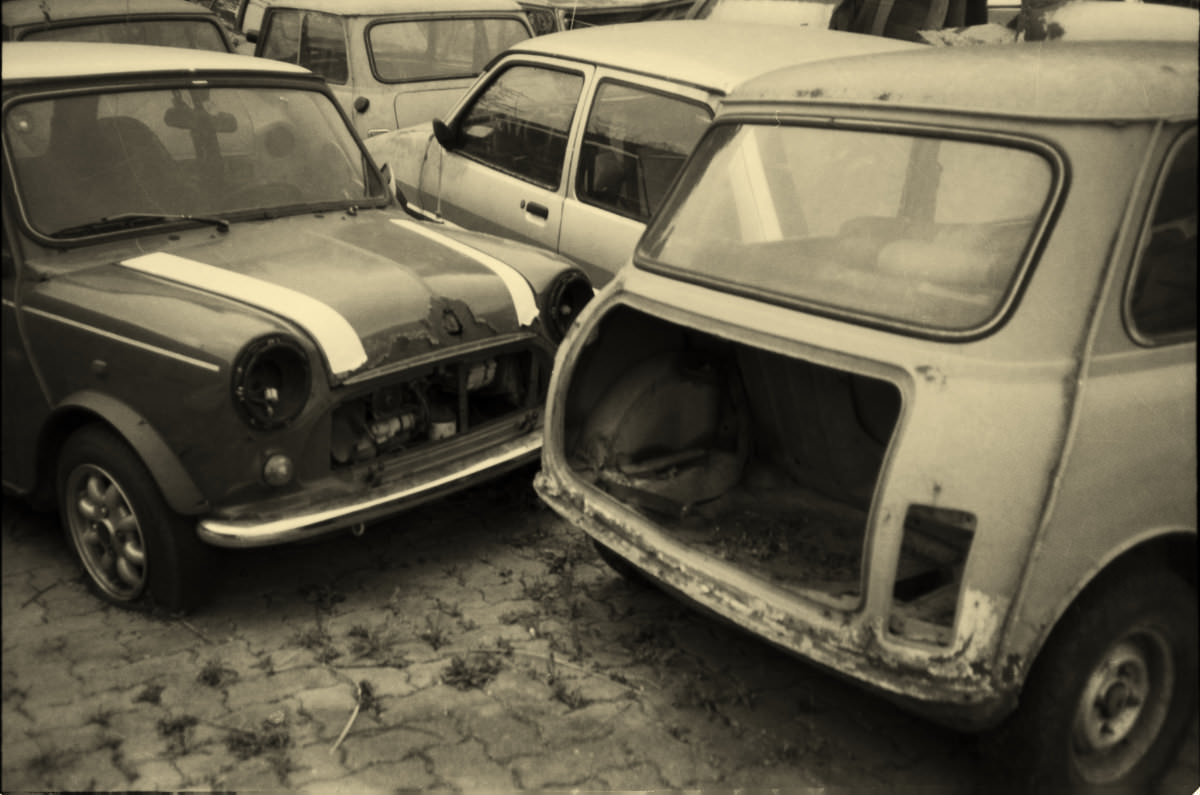

In [59]:
def make_linear_ramp(white):
    # putpalette expects [r,g,b,r,g,b,...]
    ramp = []
    r, g, b = white
    for i in range(255):
        ramp.extend((int(r*i/255),int(g*i/255),int(b*i/255)))
    return ramp
# make sepia ramp (tweak color as necessary)
sepia = make_linear_ramp((255, 240, 192))
# b&W image
sepiaImage = pic.convert("L")
# apply sepia palette
sepiaImage.putpalette(sepia)

# convert back to RGB so we can save it as JPEG
sepiaImage = sepiaImage.convert("RGB")
sepiaImage.save("sepia.jpg")
sepiaImage 

<h2>Quantize Palette Example</h2>

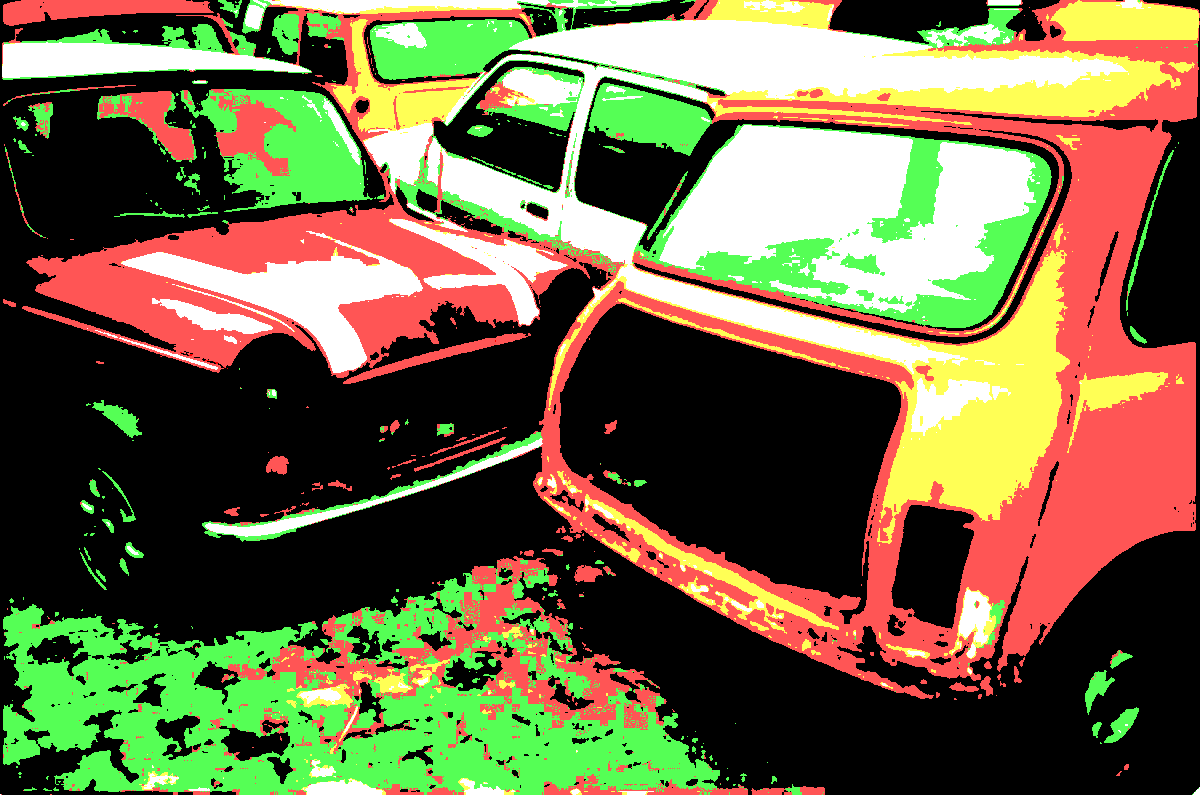

In [60]:
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""

    silf.load()

    # use palette from reference image made below
    palette.load()
    im = silf.im.convert("P", 0, palette.im)
    # the 0 above means turn OFF dithering making solid colors
    return silf._new(im)

palettedata = [ 0, 0, 0, 255, 0, 0, 255, 255, 0, 0, 255, 0, 255, 255, 255,85,255,85, 255,85,85, 255,255,85] 

#   palettedata = [ 0, 0, 0, 0,170,0, 170,0,0, 170,85,0,] # pallet 0 dark
#   palettedata = [ 0, 0, 0, 85,255,85, 255,85,85, 255,255,85]  # pallet 0 light

#   palettedata = [ 0, 0, 0, 85,255,255, 255,85,255, 255,255,255,]  #pallete 1 light
#   palettedata = [ 0, 0, 0, 0,170,170, 170,0,170, 170,170,170,] #pallete 1 dark
#   palettedata = [ 0,0,170, 0,170,170, 170,0,170, 170,170,170,] #pallete 1 dark sp

#   palettedata = [ 0, 0, 0, 0,170,170, 170,0,0, 170,170,170,] # pallet 3 dark
#   palettedata = [ 0, 0, 0, 85,255,255, 255,85,85, 255,255,255,] # pallet 3 light

#  grey  85,85,85) blue (85,85,255) green (85,255,85) cyan (85,255,255) lightred 255,85,85 magenta (255,85,255)  yellow (255,255,85) 
# black 0, 0, 0,  blue (0,0,170) darkred 170,0,0 green (0,170,0)  cyan (0,170,170)magenta (170,0,170) brown(170,85,0) light grey (170,170,170) 
#  
# below is the meat we make an image and assign it a palette
# after which it's used to quantize the input image, then that is saved 
palimage = Image.new('P', (16, 16))
palimage.putpalette(palettedata *32)

oldimage = pic.convert("RGB")
newimage = quantizetopalette(oldimage, palimage, dither=False)
newimage

#   palimage.putpalette(palettedata *64)  64 times 4 colors on the 256 index 4 times, == 256 colors, we made a 256 color pallet.